<a href="https://colab.research.google.com/github/patztablook22/mandelbrot/blob/master/Mandelbrot_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bureaucracy

In [6]:
!apt-get install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono g

In [10]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


# Mandelbrot with GPU-optimization

Mandelrot's set $M$:

$ \forall m \in \mathbb{C}: m \in M \leftrightarrow z = z^2 + m$ converges

In [2]:
import numpy as np
#import tensorflow as tf
import tensorflow.compat.v1 as tf
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
# mafs

def mandelbrot(c, threshold, exponent = 2):

  z = tf.zeros_like(c)

  # parallel iteration
  for i in range(threshold):
    z = z**exponent + c

  a = tf.abs(z)  
  # b = tf.constant(5, dtype = tf.dtypes.double)
  # not_diverged = (a <= b)
  # m = not_diverged* threshold
  return a



In [4]:
def render(resolutionXY, rangeX, rangeY):

  samplesX = tf.linspace(*rangeX, resolutionXY[0])
  samplesY = tf.linspace(*rangeY, resolutionXY[1])
  
  samplesX = tf.cast(samplesX, tf.double)
  samplesY = tf.cast(samplesY, tf.double)
  
  a,b      = tf.meshgrid(samplesX, samplesY)
  samples  = tf.complex(a, b) 

  m = mandelbrot(samples, 50)
  return sess.run(m)

progress: 100
progress: 100
progress: 100
progress: 104


/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:455: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:460: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


progress: 108
progress: 112
progress: 116
progress: 120
progress: 124
progress: 128
progress: 132
progress: 136
progress: 140
progress: 144
progress: 148
progress: 152
progress: 156
progress: 160
progress: 164
progress: 168
progress: 172
progress: 176
progress: 180
progress: 184
progress: 188
progress: 192
progress: 196
progress: 200
progress: 204
progress: 208
progress: 212
progress: 216
progress: 220
progress: 224
progress: 228
progress: 232
progress: 236
progress: 240
progress: 244
progress: 248
progress: 252
progress: 256
progress: 260
progress: 264
progress: 268
progress: 272
progress: 276
progress: 280
progress: 284
progress: 288
progress: 292
progress: 296
progress: 300
progress: 304
progress: 308
progress: 312
progress: 316
progress: 320
progress: 324
progress: 328
progress: 332
progress: 336
progress: 340
progress: 344
progress: 348
progress: 352
progress: 356
progress: 360
progress: 364
progress: 368
progress: 372
progress: 376
progress: 380
progress: 384
progress: 388
progre

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:475: RuntimeWarning: invalid value encountered in true_divide
  A_scaled /= ((a_max - a_min) / 0.8)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:488: RuntimeWarning: invalid value encountered in multiply
  A_resampled *= ((a_max - a_min) / 0.8)


progress: 484
progress: 488
progress: 492
progress: 496
progress: 500
progress: 504
progress: 508
progress: 512
progress: 516
progress: 520
progress: 524
progress: 528
progress: 532
progress: 536
progress: 540
progress: 544
progress: 548
progress: 552
progress: 556
progress: 560
progress: 564
progress: 568
progress: 572
progress: 576
progress: 580
progress: 584
progress: 588
progress: 592
progress: 596
progress: 600
progress: 604
progress: 608
progress: 612
progress: 616
progress: 620
progress: 624
progress: 628
progress: 632
progress: 636
progress: 640
progress: 644
progress: 648
progress: 652
progress: 656
progress: 660
progress: 664
progress: 668
progress: 672
progress: 676
progress: 680
progress: 684
progress: 688
progress: 692
progress: 696
progress: 700
progress: 704
progress: 708
progress: 712
progress: 716
progress: 720
progress: 724
progress: 728
progress: 732
progress: 736
progress: 740
progress: 744
progress: 748
progress: 752
progress: 756
progress: 760
progress: 764
progre

MovieWriter stderr:
convert-im6.q16: DistributedPixelCache '127.0.0.1' @ error/distribute-cache.c/ConnectPixelCacheServer/244.
convert-im6.q16: cache resources exhausted `out.gif' @ error/cache.c/OpenPixelCache/3984.
convert-im6.q16: DistributedPixelCache '127.0.0.1' @ error/distribute-cache.c/ConnectPixelCacheServer/244.
convert-im6.q16: cache resources exhausted `out.gif' @ error/cache.c/OpenPixelCache/3984.



CalledProcessError: ignored

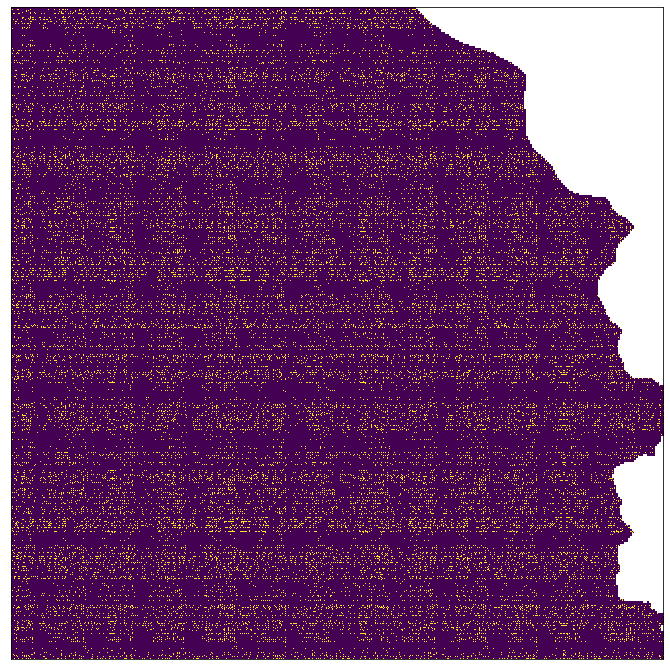

In [7]:
center = (-.746, 0.1495)
radius = 2
resXY  = (320, 320)
fig = plt.figure(figsize=(12,12))
ax  = plt.axes()

def tick(i):
  i *= 4
  i += 100
  r = radius / (1 + (i/275)**8)
  z = render(
    resolutionXY = resXY,
    rangeX       = (center[0] - r, center[0] + r),
    rangeY       = (center[1] - r, center[1] + r),
  )
  print("progress: {}".format(i))
  ax.clear()
  ax.set_xticks([])
  ax.set_yticks([])
  return [ax.imshow(z)]

ani = 0
with tf.Session() as sess:
  ani = FuncAnimation(
      fig      = fig,
      func     = tick,
      frames   = 190,
      interval = 30,
      blit     = True,
  )
  ani.save("out.gif", writer="imagemagick", )


In [11]:
cp out.gif drive/MyDrive/out/out12.gif